In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
results = pd.DataFrame()
for file in [f for f in os.listdir('../data/') if f.startswith('res_') and f.endswith('.csv')]:
    df = pd.read_csv('../data/{}'.format(file), index_col=[0])
    results = pd.concat([results, df], axis=0, sort=False)
    
results['savgol__window_length'] = results['savgol__window_length']+1
results.fillna('NA', inplace=True)


results.drop(['RMSE opt-r2', 'R2 opt-r2'], axis=1, inplace=True)
results.rename(columns={'RMSE opt-rmse':'RMSE', 'R2 opt-rmse':'R2'}, inplace=True)
results.sort_values('RMSE', inplace=True)
results

,alpha,l1_ratio,pca__n_components,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length,RMSE,R2,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10,C,epsilon,kernel
SVM,NA,NA,23.0,1.0,3.0,1398.0,1038.0,15.0,4.765191,0.705190,0.162437,0.302876,0.463621,0.580372,0.771574,0.910321,0.972927,12.5893,0.158489,0
lasso,0.0630957,NA,30.0,2.0,3.0,1412.0,984.0,13.0,4.805789,0.700145,0.164129,0.321489,0.460237,0.566836,0.771574,0.901861,0.967851,NA,NA,NA
ridge,1,NA,26.0,1.0,3.0,1402.0,1026.0,17.0,4.817816,0.698642,0.125212,0.313029,0.448393,0.565144,0.763113,0.912014,0.976311,NA,NA,NA
elnet,0.0891251,1,26.0,2.0,3.0,1330.0,1036.0,13.0,4.885054,0.690172,0.169205,0.316413,0.456853,0.592217,0.781726,0.903553,0.957699,NA,NA,NA


# scores

In [3]:
# Sorted by RMSE
results[['RMSE', 'R2']]

,RMSE,R2
SVM,4.765191,0.705190
lasso,4.805789,0.700145
ridge,4.817816,0.698642
elnet,4.885054,0.690172


In [4]:
# Sorted by RMSE
results[['R2', 'RMSE', ]].sort_values('R2', ascending = False)

,R2,RMSE
SVM,0.705190,4.765191
lasso,0.700145,4.805789
ridge,0.698642,4.817816
elnet,0.690172,4.885054


In [5]:
# PCA
results[['pca__n_components']]

,pca__n_components
SVM,23.0
lasso,30.0
ridge,26.0
elnet,26.0


In [6]:
# Savgol
results[[col for col in results.columns if col.startswith('savgol_')]]

,savgol__deriv,savgol__polyorder,savgol__wavemax,savgol__wavemin,savgol__window_length
SVM,1.0,3.0,1398.0,1038.0,15.0
lasso,2.0,3.0,1412.0,984.0,13.0
ridge,1.0,3.0,1402.0,1026.0,17.0
elnet,2.0,3.0,1330.0,1036.0,13.0


In [7]:
# Accuracy
df = results[[col for col in results.columns if col.startswith('preds')]]
df = df*100
df

,preds +/-1,preds +/-2,preds +/-3,preds +/-4,preds +/-6,preds +/-8,preds +/-10
SVM,16.243655,30.287648,46.362098,58.037225,77.157360,91.032149,97.292724
lasso,16.412860,32.148900,46.023689,56.683587,77.157360,90.186125,96.785110
ridge,12.521151,31.302876,44.839255,56.514382,76.311337,91.201354,97.631134
elnet,16.920474,31.641286,45.685279,59.221658,78.172589,90.355330,95.769882


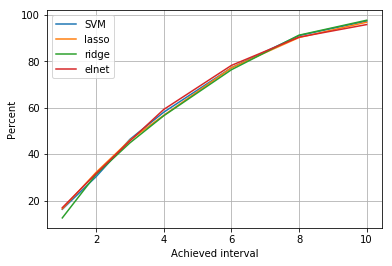

In [8]:

for acc in df.index:
    plt.plot([1,2,3,4,6,8,10], df.loc[acc].values, label=acc)
    #print(df.loc[acc].values)

plt.ylabel('Percent')
plt.xlabel('Achieved interval')
plt.grid()
plt.legend()
plt.savefig('results - interval.png')
plt.show()

# Regularization

In [9]:
results[['alpha', 'l1_ratio', 'C', 'epsilon']]

,alpha,l1_ratio,C,epsilon
SVM,NA,NA,12.5893,0.158489
lasso,0.0630957,NA,NA,NA
ridge,1,NA,NA,NA
elnet,0.0891251,1,NA,NA
